<a href="https://colab.research.google.com/github/fberetta8/ML_in_Finance_Spring_2025_ETH/blob/main/Notebook4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits for this exercise to [Tengyingzi (Sophia) Perrin](https://people-new.math.ethz.ch/~tengma/about ), who taught the class in FS24.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as s
import torch

# **European call option in BS model**  
A **European option** is a type of financial derivative that can only be exercised at its expiration date, and not before. We describe here a **call option**, meaning that one acquires the right to buy at a fixed price (strike).  This is different from an **American option**, which can be exercised at any time before expiration.  

In [ ]:
class EuropeanCallOption(object):
    def __init__(self, S0, K, r, T, sigma, M, I):
        """
        Parameters:
        S0 : Initial stock price
        K : Strike price
        r : Risk-free interest rate
        T : Time to maturity
        sigma : Volatility
        M : Number of time steps for simulation
        I : Number of simulation paths (Monte Carlo simulations)
        """
        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma
        self.M = M
        self.I = I

    def value(self):
        """
        Compute the theoretical Black-Scholes price of the European call option.

        Uses the Black-Scholes formula:
        C = S0 * N(d1) - K * e^(-rT) * N(d2)
        where:
        d1 = (ln(S0/K) + (r + 0.5 * sigma^2) * T) / (sigma * sqrt(T))
        d2 = d1 - sigma * sqrt(T)

        Returns:
        Black-Scholes price of the option
        """
        # TODO: Write the option pricing

        return value

    def simulation(self):
        """
        Simulate stock price paths using the Monte Carlo method and compute the option payoff.

        Stock price follows the Geometric Brownian Motion (ie, BS model):
        S(t+dt) = S(t) * exp((r - 0.5 * sigma^2) * dt + sigma * sqrt(dt) * Z)
        where Z ~ N(0,1) (standard normal distribution)

        Returns:
        S : Simulated stock price paths
        payoff : Payoffs for the option
        """
        # TODO: Write the simulation function

        return S, payoff

In [ ]:
# Run Monte Carlo simulation to compute option price
prices,payoff = EuropeanCallOption(100, 105, 0.05, 1, 0.2, 100000, 1000).simulation()
# Compute Monte Carlo estimated option price
option_price = np.mean(payoff[-1])*np.exp(-0.05*1)
# Compute the Black-Scholes price
BS_price = EuropeanCallOption(100, 105, 0.05, 1, 0.2, 100000, 1000).value()

8.544142218351526
8.021352235143176


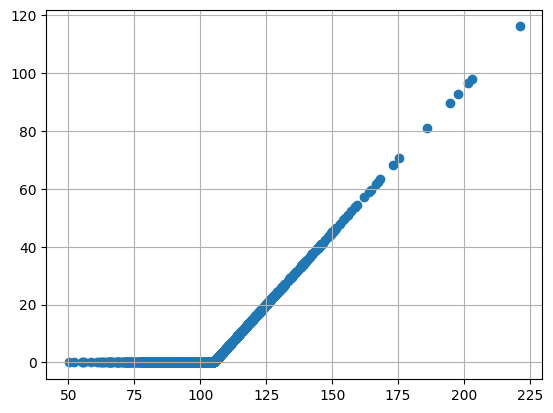

In [ ]:
# Scatter plot of the simulated final stock prices vs. option payoffs
plt.scatter(prices[-1],payoff[-1])
plt.grid()
print(option_price)
print(BS_price)

# **Digital call option in BS model**  
In a **digital call option**, the payoff is fixed (e.g., 1 unit of currency) if the stock price is above the strike price at expiration. Unlike a standard call option, a digital call does not scale with the stock price—it either pays out or does not.  

In [ ]:
class DigitalCallOption(object):
    def __init__(self, S0, K, r, T, sigma, Q, M, I):
        """
        Initialize the DigitalCallOption class.

        Parameters:
        S0 : Initial stock price
        K : Strike price (threshold price)
        r : Risk-free interest rate
        T : Time to maturity (in years)
        sigma : Volatility
        Q : Fixed payout if the option expires in-the-money
        M : Number of time steps for Monte Carlo simulation
        I : Number of simulation paths (Monte Carlo simulations)
        """
        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma
        self.Q = Q
        self.M = M
        self.I = I

    def value(self):
        """
        Calculate the theoretical price of the Digital Call Option using Black-Scholes formula.

        The pricing formula is:
        Value = Q * N(d2) * e^(-rT)

        where:
        d2 = (ln(S0/K) + (r - 0.5 * sigma^2) * T) / (sigma * sqrt(T))

        Returns:
        Theoretical price of the digital call option
        """
        # TODO: Write the option pricing

        return value

    def simulation(self):
        """
        Simulate the stock price paths using the Monte Carlo method
        and compute the digital call option payoff.

        If S_T > K (final price > strike), payoff = 1
        Otherwise, payoff = 0

        Returns:
        S : Simulated stock price paths
        payoff : Payoffs (1 or 0 depending on stock price at expiration)
        """

        # TODO: Write the simulation function

        return S, payoff

In [ ]:
# Run Monte Carlo simulation to compute option price
prices,payoff = DigitalCallOption(100, 105, 0.05, 1.0, 0.2,5,5000,1000).simulation()
# Compute Monte Carlo estimated option price
option_price = np.sum(payoff[-1])/1000 * 5 * np.exp(-0.05 * 1)
# Compute the Black-Scholes price
BS_price = DigitalCallOption(100, 105, 0.05, 1.0, 0.2,5,5000,1000).value()

2.3209997957817423
2.200070529682731


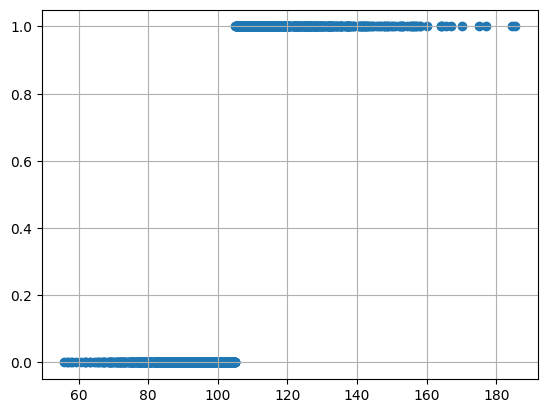

In [ ]:
# Scatter plot of the simulated final stock prices vs. option payoffs
plt.scatter(prices[-1],payoff[-1])
plt.grid()
print(option_price)
print(BS_price)

# **BS vs Heston model**

The **Heston Model** is a widely-used **stochastic volatility model** in finance that describes asset price dynamics, where volatility is not constant but instead follows a random process.
- The asset price $S$ follows a **geometric Brownian motion** with volatility evolving over time. The price is given by:
  $$
  dS_t = rS_t dt + \sqrt{v_t} S_t dW_{t}
  $$
  where:
  - $r$ is the risk-free rate,
  - $v$ is the instantaneous volatility (variance) at time $t$,
  - $W$ is a Wiener process for the asset price.

- The volatility $v$ follows a **mean-reverting process**, which is modeled by:
  $$
  dv_t = \kappa(\theta - v_t) dt + \xi \sqrt{v_t} dV_{t}
  $$
  where:
  - $\kappa$ is the speed of mean reversion,
  - $\theta$ is the long-term mean volatility level,
  - $\xi$ is the volatility of volatility,
  - $B$ is a Wiener process for volatility.

- The two processes $W$ and $B$ are **correlated** with a correlation coefficient $\rho$, meaning that changes in asset prices are related to changes in volatility.

In [ ]:
class HestonModel(object):
    def __init__(self,S, T, r, kappa, theta, v_0, rho, xi, steps, Npaths):
      self.S = S
      self.v_0 = v_0
      self.T = T
      self.r = r
      self.kappa = kappa
      self.theta = theta
      self.rho = rho
      self.xi = xi
      self.steps = steps
      self.Npaths = Npaths

    def heston_paths(self):

      # TODO: Write the Heston simulation

      return prices,sigs

In [ ]:
# Positive correlation
S_p,V_p = HestonModel(100, 1, 0.02, 4.0, 0.02, 0.02, 0.7, 0.9, 10000, 100).heston_paths()
# Negative correlation
S_n,V_n = HestonModel(100, 1, 0.02, 4.0, 0.02, 0.02, -0.7, 0.9, 10000, 100).heston_paths()

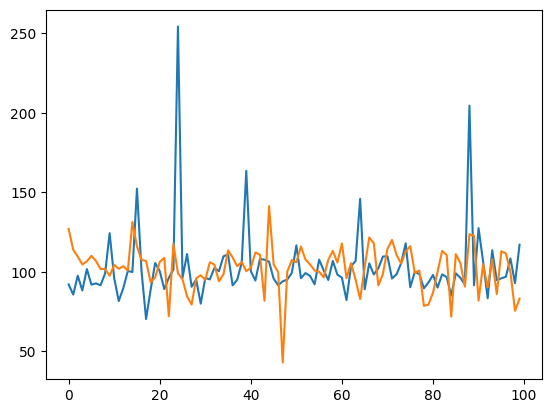

In [ ]:
plt.plot(S_p[:,-1])
plt.plot(S_n[:,-1])

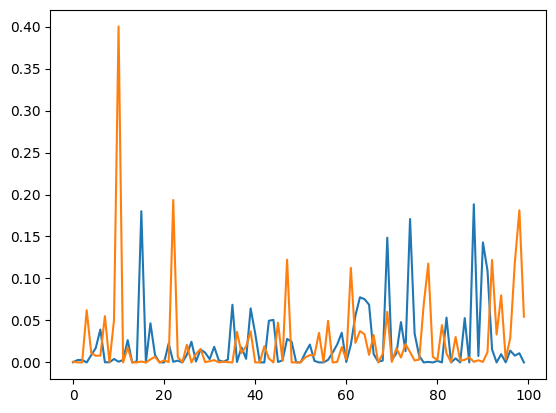

In [ ]:
plt.plot(V_p[:,-1])
plt.plot(V_n[:,-1])